In [61]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import math
import numpy as np
import matplotlib.pyplot as plt

In [51]:
matchs = pd.read_csv('Data/Matchs_ENG.csv')
fmatchs = matchs.copy()
matchs=matchs[matchs.Div == 'E0']
fmatchs.Date = pd.to_datetime(fmatchs.Date,dayfirst =True)
#fmatchs=fmatchs[(fmatchs.Div == 'E0') | (fmatchs.Div == 'E1')]
print(len(fmatchs),len(matchs))
matchs.Date = pd.to_datetime(matchs.Date,dayfirst =True)
matchs.head(5)

21569 4039


,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,Season
0,0,E0,2009-08-15,Aston Villa,Wigan,0.0,2.0,A,1.67,3.60,5.50,2009/2010
1,1,E0,2009-08-15,Blackburn,Man City,0.0,2.0,A,3.60,3.25,2.10,2009/2010
2,2,E0,2009-08-15,Bolton,Sunderland,0.0,1.0,A,2.25,3.25,3.25,2009/2010
3,3,E0,2009-08-15,Chelsea,Hull,2.0,1.0,H,1.17,6.50,21.00,2009/2010
4,4,E0,2009-08-15,Everton,Arsenal,1.0,6.0,A,3.20,3.25,2.30,2009/2010


In [3]:
lst=[]
for s in matchs.Season.unique():
    lst+=[((matchs[matchs.Season == s].FTHG.sum()+matchs[matchs.Season == s].FTAG.sum())/10/38,matchs[matchs.Season == s].FTHG.sum()/10/38,
           matchs[matchs.Season == s].FTAG.sum()/10/38,s)]
data = pd.DataFrame(lst,columns=['Moy. But total','Moy. But domicile','Moy. But extérieur','Season'])
data.set_index('Season',inplace=True)

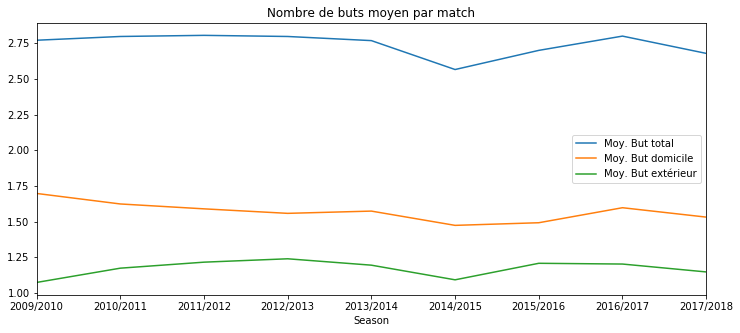

In [5]:
data.head(9).plot(figsize=(12,5),title='Nombre de buts moyen par match')

In [6]:
lst=[]
for s in matchs.Season.unique():
    H = matchs[matchs.Season == s].FTR.sum().count('H')
    A = matchs[matchs.Season == s].FTR.sum().count('A')
    D = matchs[matchs.Season == s].FTR.sum().count('D')
    lst+=[(H/10/38,D/10/38,A/10/38,s)]
data = pd.DataFrame(lst,columns=['Victoire Domicile','Match Nul','Victoire Extérieur','Season'])
data.set_index('Season',inplace=True)

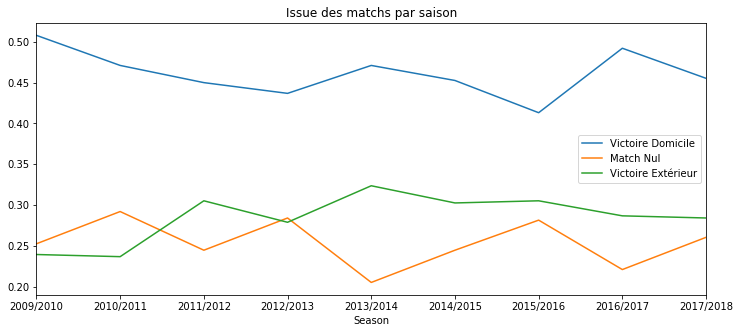

In [7]:
data.head(9).plot(figsize=(12,5),title='Issue des matchs par saison')

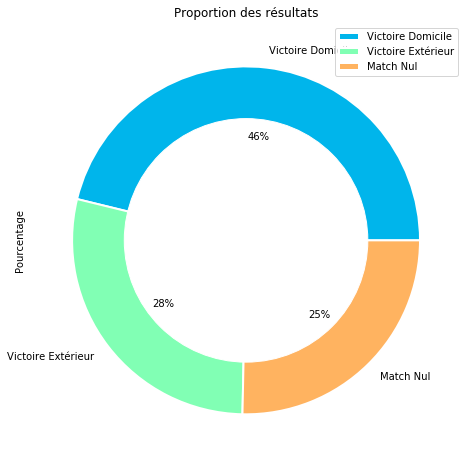

In [12]:
lst=[]
for s in matchs.Season.unique():
    H = matchs[matchs.Season == s].FTR.sum().count('H')
    A = matchs[matchs.Season == s].FTR.sum().count('A')
    D = matchs[matchs.Season == s].FTR.sum().count('D')
    lst+=[(H/10/38,D/10/38,A/10/38,s)]
data = pd.DataFrame(lst,columns=['Victoire Domicile','Match Nul','Victoire Extérieur','Season'])
data.set_index('Season',inplace=True)
pd.DataFrame([data['Victoire Domicile'].head(8).sum()/8,data['Victoire Extérieur'].head(8).sum()/8,
              data['Match Nul'].head(8).sum()/8],index=['Victoire Domicile','Victoire Extérieur','Match Nul'],columns=['Pourcentage']).plot.pie(y='Pourcentage',autopct = "%1.0f%%",
                                             colors =sns.color_palette("rainbow",3),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"},figsize=(8,8))
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title('Proportion des résultats')
plt.show()

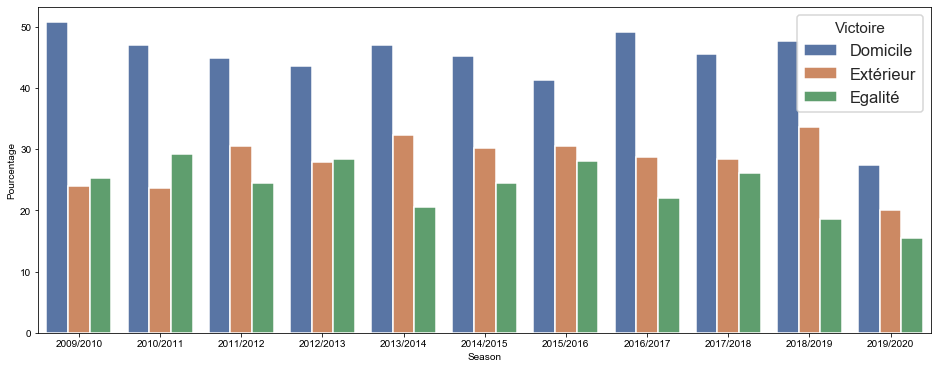

In [13]:
lst=[]
for s in matchs.Season.unique():
    H = matchs[matchs.Season == s].FTR.sum().count('H')
    A = matchs[matchs.Season == s].FTR.sum().count('A')
    D = matchs[matchs.Season == s].FTR.sum().count('D')
    lst+=[((H/10/38)*100,'Domicile',s)]
    lst+=[((A/10/38)*100,'Extérieur',s)]
    lst+=[((D/10/38)*100,'Egalité',s)]
data = pd.DataFrame(lst,columns=['Pourcentage','Victoire','Season'])
fig, ax = plt.subplots(figsize=(16,6))
sns.set(style="white", context="talk")
sns.barplot(x="Season", y="Pourcentage", hue="Victoire", data=data)

Text(0.5, 1.0, "Equipes scorant le plus à l'extérieur")

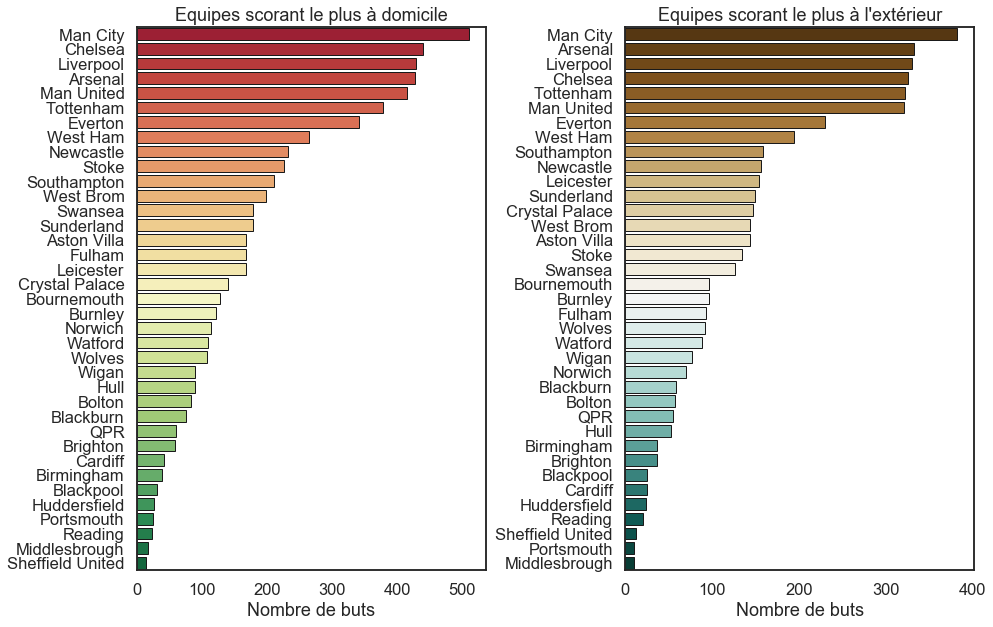

In [14]:
lst=[]
equipe = set(list(matchs.HomeTeam.unique())+list(matchs.AwayTeam.unique()))
for s in matchs.Season.unique():
    for eq in equipe:
        lst+=[(matchs[(matchs.Season == s) & (matchs.HomeTeam == eq)].FTHG.sum(),'Domicile',eq,s)]
        lst+=[(matchs[(matchs.Season == s) & (matchs.AwayTeam == eq)].FTAG.sum(),'Extérieur',eq,s)]
data = pd.DataFrame(lst,columns=['Nombre de buts','Matchs','Equipe','Saison'])
data.set_index('Saison',inplace=True)
lst=[]
for eq in equipe:
    lst+=[(data[(data.Equipe == eq) & (data.Matchs =='Domicile')]['Nombre de buts'].sum(),'Domicile',eq)]
    lst+=[(data[(data.Equipe == eq) & (data.Matchs =='Extérieur')]['Nombre de buts'].sum(),'Exterieur',eq)]
data = pd.DataFrame(lst,columns=['Nombre de buts','Matchs','Equipe'])
data.set_index('Equipe',inplace=True)
d1 = data[data.Matchs == 'Domicile'].sort_values('Nombre de buts',ascending=False)
d2 = data[data.Matchs == 'Exterieur'].sort_values('Nombre de buts',ascending=False)
plt.figure(figsize=(15,10))
plt.subplot(121)
ax = sns.barplot(y=d1.index,x="Nombre de buts",
                 data=d1,palette="RdYlGn",
                 linewidth = 1,edgecolor = "k"*20)
plt.ylabel('')
plt.title("Equipes scorant le plus à domicile")
plt.subplot(122)
ax = sns.barplot(y=d2.index,x="Nombre de buts",
                 data=d2,palette="BrBG",
                 linewidth = 1,edgecolor = "k"*20)
plt.ylabel('')
plt.subplots_adjust(wspace = .4)
plt.title("Equipes scorant le plus à l'extérieur")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

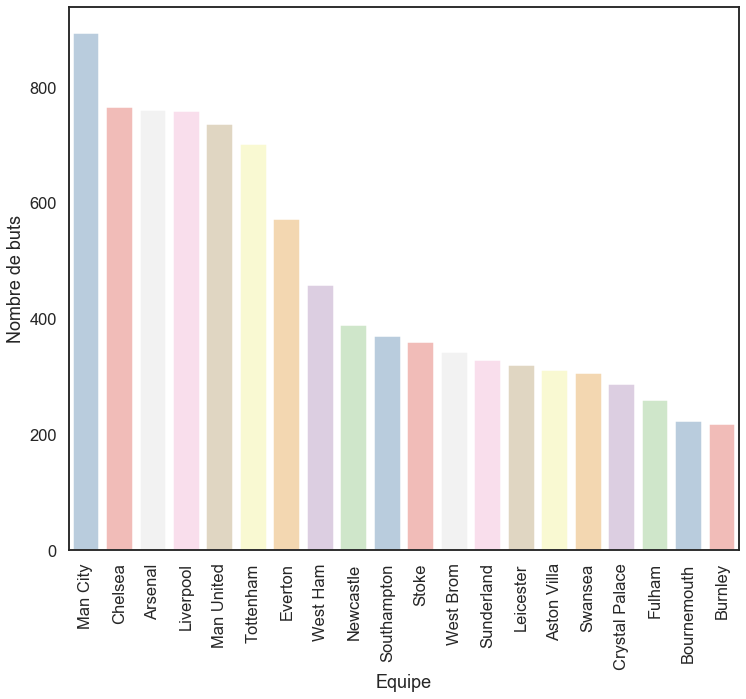

In [15]:
df = pd.DataFrame(index=data.index.unique(),columns=['Nombre de buts'])
for eq in data.index.unique():
    df.loc[eq]['Nombre de buts']=data.loc[eq]['Nombre de buts'].sum()
df.sort_values('Nombre de buts',ascending=False,inplace=True)
plt.figure(figsize=(12,10))
sns.barplot(data=df.head(20),y='Nombre de buts',x=df.head(20).index,palette=reversed(sns.color_palette('Pastel1', 20)))
plt.xticks(rotation=90)

In [16]:
lst,premier,deuxieme,troisieme,quatrieme = [],[],[],[],[]
lst+=[list(Classement("201"+str(i+1)+"/7/30","201"+str(i)+"/201"+str(i+1),"E0",matchs).Eq) for i in range(0,9)]
for i in range(0,9):
    premier+=[lst[i][0]]
    deuxieme+=[lst[i][1]]
    troisieme+=[lst[i][2]]
    quatrieme+=[lst[i][3]]
first = { i : premier.count(i) for i in premier }
snd = { i : deuxieme.count(i) for i in deuxieme }
tro = { i : troisieme.count(i) for i in troisieme }
qua = { i : quatrieme.count(i) for i in quatrieme }

NameError: name 'Classement' is not defined

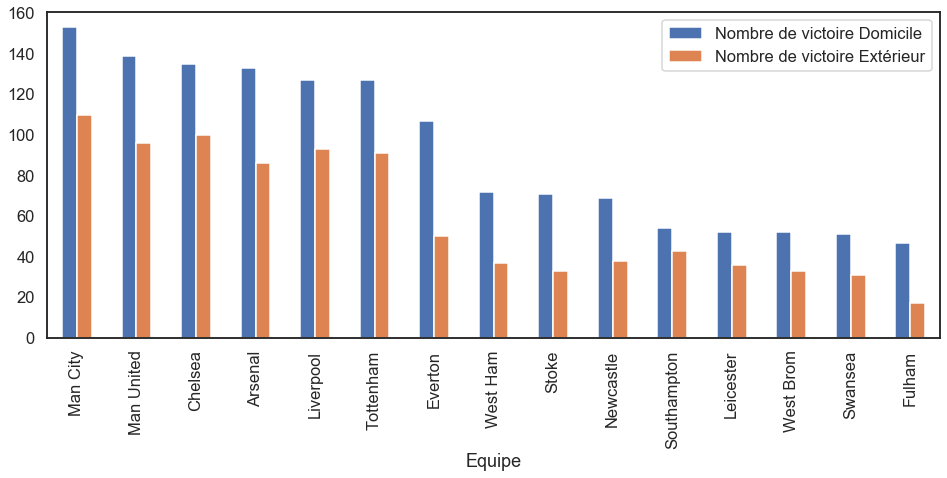

In [17]:
lst=[]
for eq in equipe:
    lst+=[(matchs[matchs.HomeTeam == eq].FTR.sum().count("H"),matchs[matchs.AwayTeam == eq].FTR.sum().count("A"),eq)]
data = pd.DataFrame(lst,columns=['Nombre de victoire Domicile','Nombre de victoire Extérieur',"Equipe"])
data.set_index('Equipe',inplace=True)
data.sort_values(['Nombre de victoire Domicile','Nombre de victoire Extérieur'],ascending=False,inplace=True)
data.head(15).plot.bar(figsize=(16,6))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

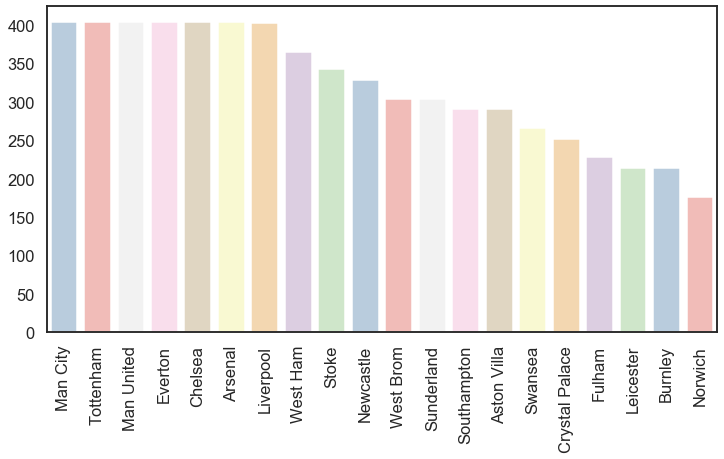

In [18]:
plt.figure(figsize=(12,6))
sns.barplot((matchs.HomeTeam.value_counts()+matchs.AwayTeam.value_counts()).sort_values(ascending=False).head(20).index,(matchs.HomeTeam.value_counts()+matchs.AwayTeam.value_counts()).sort_values(ascending=False).head(20).values,palette=reversed(sns.color_palette('Pastel1', 20)))
plt.xticks(rotation=90)

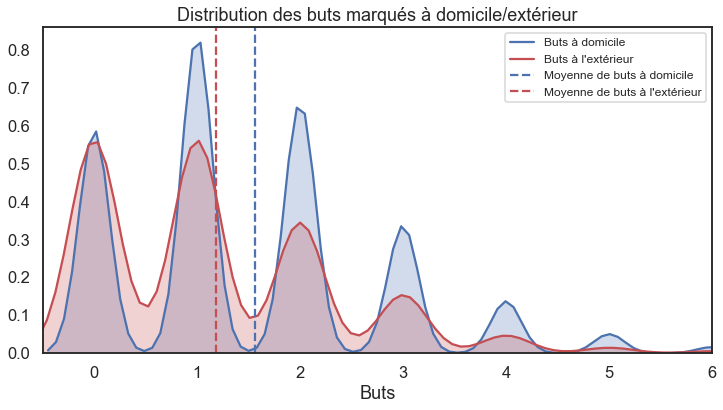

In [19]:
plt.figure(figsize=(12,6))
sns.kdeplot(matchs.FTHG,shade=True,
            color="b",label="Buts à domicile")
sns.kdeplot(matchs.FTAG,shade=True,
            color="r",label="Buts à l'extérieur")
plt.axvline(matchs.FTHG.mean(),linestyle = "dashed",
            color="b",label="Moyenne de buts à domicile")
plt.axvline(matchs.FTAG.mean(),linestyle = "dashed",
            color="r",label="Moyenne de buts à l'extérieur")
plt.legend(loc="best",prop = {"size" : 12})
plt.title("Distribution des buts marqués à domicile/extérieur")
plt.xlabel("Buts")
plt.xlim(-0.5, 6)
plt.show()

(0, 3)

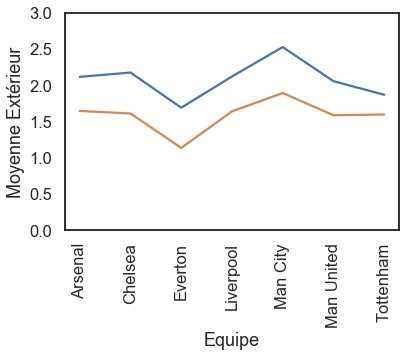

In [20]:
top7 = (matchs.HomeTeam.value_counts()+matchs.AwayTeam.value_counts()).sort_values(ascending=False).head(7).index
lst=[]
for i in top7:
    lst+=[(matchs[matchs.HomeTeam ==i].FTHG.mean(),matchs[matchs.AwayTeam ==i].FTAG.mean(),i)]
data = pd.DataFrame(lst,columns=['Moyenne Domicile','Moyenne Extérieur','Equipe'])
data.set_index('Equipe',inplace=True)
sns.lineplot(data=data,x=data.index,y='Moyenne Domicile')
sns.lineplot(data=data,x=data.index,y='Moyenne Extérieur')
plt.xticks(rotation=90)
plt.ylim(0,3)

In [21]:
dic={
    'OddsOK':0,
    'OddsKO':0
}
for index,row in matchs.iterrows():
    if row.FTR == 'H' and row.B365H < row.B365D and row.B365H < row.B365A:
        dic['OddsOK']+=1
    elif row.FTR == 'A' and row.B365A < row.B365H and row.B365A < row.B365D:
        dic['OddsOK']+=1
    elif row.FTR == 'D' and row.B365D < row.B365H and row.B365D < row.B365A:
        dic['OddsOK']+=1
    else:
        dic['OddsKO']+=1
print('Les bookmakers ont eu raison sur {} % des matchs.'.format((dic['OddsOK']/len(matchs))*100))## Analyse de transfertmarket

Les bookmakers ont eu raison sur 54.39465214161922 % des matchs.


## Analyse de transfertmarket

In [34]:
tm = pd.read_csv('Data/BPL_transfert_market3.csv')
tm.Valeur = tm.Valeur.apply(lambda x : int(x.replace('€','').replace('.00m','000000').replace('k','000').replace('-','0').replace('m','0000').replace('.',''))/1000000)
tm['Age'] = tm.DateNaissance.replace('- (-)','').apply(lambda x: int(x[-3:-1]) if len(x)>1 else 0)
tm['Taille'].fillna(180,inplace=True)
tm['Taille'] = tm['Taille'].replace(' m','180')
tm['Taille'] = tm.Taille.apply(lambda x:int(str(x).replace(',','').replace('m','')))
tm.Taille=tm.Taille.apply(lambda x: str(x).replace("m",'').replace(",",""))
tm.Taille.fillna(0,inplace=True)
tm.Taille=tm.Taille.replace('nan',0)
tm.Taille=tm.Taille.replace(' ',0)
tm.Taille=tm.Taille.map(int)
tm.head(5)

,Unnamed: 0,Joueur,Numero,Equipe,DateNaissance,Nationalité,Taille,Pied,Signature,AncienClub,FinContrat,Valeur,Saison,Age
0,0,Edwin van der Sar,1,Manchester United,"Oct 29, 1970 (39)",Netherlands,199,right,"Jul 1, 2005",Fulham FC,-,4.5,2010,39
1,1,Anders Lindegaard,34,Manchester United,"Apr 13, 1984 (26)",Denmark,193,right,"Jan 6, 2011",Aalesunds FK,-,0.8,2010,26
2,2,Nemanja Vidic‎,15,Manchester United,"Oct 21, 1981 (28)",Serbia,187,right,"Jan 5, 2006",Spartak Moscow,-,35.0,2010,28
3,3,Jonny Evans,23,Manchester United,"Jan 3, 1988 (22)",Northern Ireland,188,both,"Jul 1, 2006",Manchester United U18,-,8.5,2010,22
4,4,John O'Shea,22,Manchester United,"Apr 30, 1981 (29)",Ireland,192,right,"Jul 1, 2001",Manchester United U23,-,7.0,2010,29


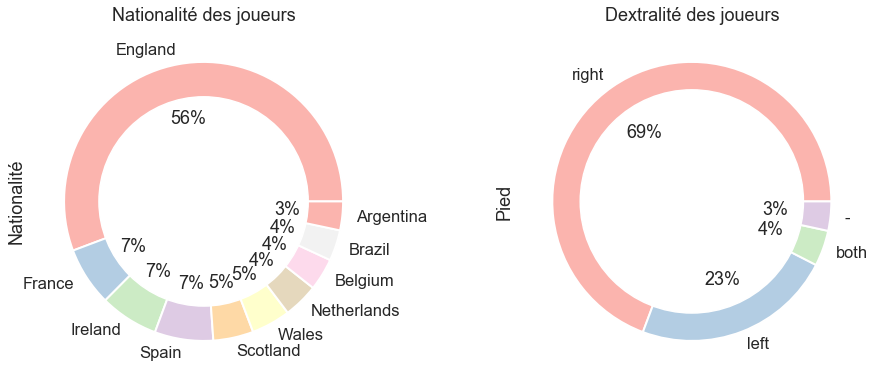

In [23]:
plt.figure(figsize=(15,15))
plt.subplot(121)
tm['Nationalité'].value_counts().head(10).plot.pie(y='Pourcentage',autopct = "%1.0f%%",
                                             colors =sns.color_palette('Pastel1', 12),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.75,color = "white")
plt.gca().add_artist(my_circ)
plt.title('Nationalité des joueurs')
plt.subplot(122)
tm['Pied'].value_counts().head(10).plot.pie(y='Pourcentage',autopct = "%1.0f%%",
                                             colors =sns.color_palette('Pastel1', 4),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.8,color = "white")
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace = .4)
plt.title('Dextralité des joueurs')
plt.show()

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 9 Text xticklabel objects>)

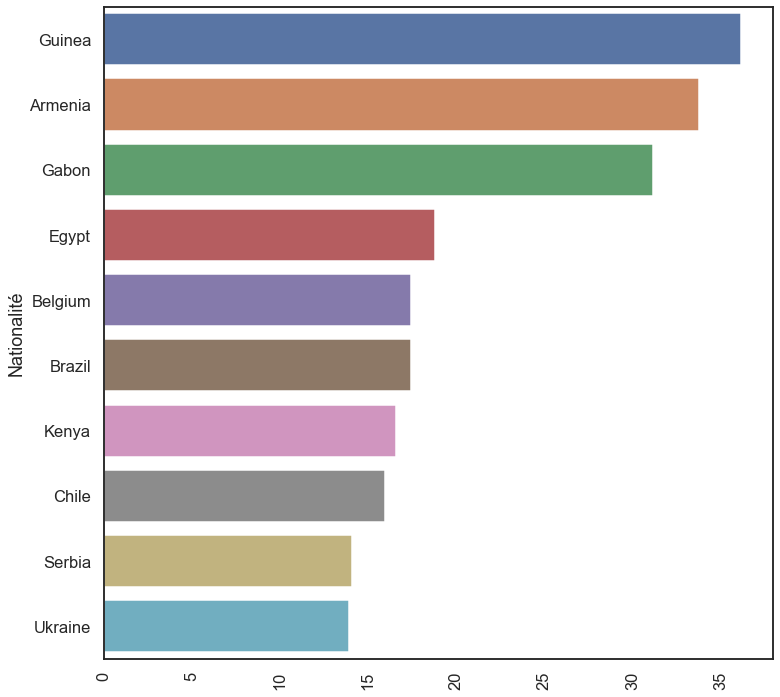

In [24]:
plt.figure(figsize=(12,12))
sns.barplot(y=tm.groupby('Nationalité').Valeur.mean().sort_values(ascending=False).head(10).index,x=tm.groupby('Nationalité').Valeur.mean().sort_values(ascending=False).head(10).values)
plt.xticks(rotation=90)

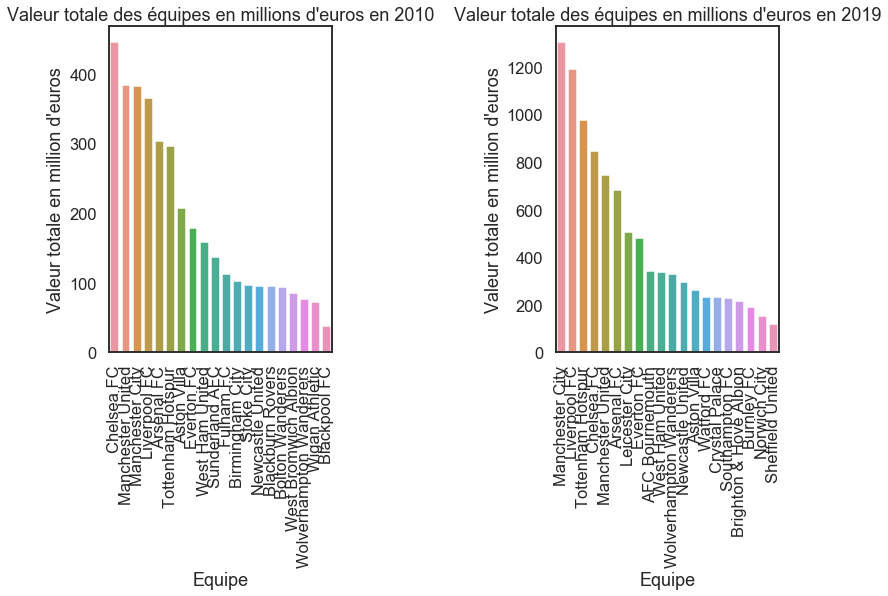

In [30]:
lst=[]
plt.figure(figsize=(12,6))
for i in range(0,10):
    for eq in tm[tm.Saison == 2010].Equipe.unique():
        lst+=[(tm[(tm.Equipe == eq )& (tm.Saison == 2010+i)].Valeur.sum(),2010+i,eq)]
data=pd.DataFrame(lst,columns=["Valeur totale en million d'euros",'Saison','Equipe']).set_index('Equipe').sort_values("Valeur totale en million d'euros",ascending=False)
data=data[data.Saison==2010]
plt.subplot(121)
sns.barplot(data=data,y="Valeur totale en million d'euros",x=data.index)
plt.title("Valeur totale des équipes en millions d'euros en "+str(2010))
plt.xticks(rotation=90)
lst=[]
for i in range(0,10):
    for eq in tm[tm.Saison == 2019].Equipe.unique():
        lst+=[(tm[(tm.Equipe == eq )& (tm.Saison == 2010+i)].Valeur.sum(),2010+i,eq)]
data=pd.DataFrame(lst,columns=["Valeur totale en million d'euros",'Saison','Equipe']).set_index('Equipe').sort_values("Valeur totale en million d'euros",ascending=False)
data=data[data.Saison==2019]
plt.subplot(122)
sns.barplot(data=data,y="Valeur totale en million d'euros",x=data.index)
plt.title("Valeur totale des équipes en millions d'euros en "+str(2019))
plt.xticks(rotation=90)

plt.subplots_adjust(wspace = 1)
plt.show()

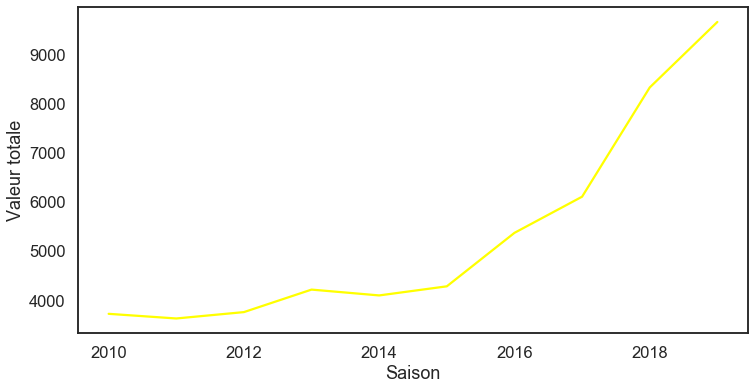

In [31]:
lst = []
plt.figure(figsize=(12,6))
for saison in tm.Saison.unique():
    lst+=[[tm[tm.Saison == saison].Valeur.sum(),saison]]
data=pd.DataFrame(lst,columns=['Valeur totale','Saison']).set_index('Saison')
lst=[]
for i in range(0,10):
    for eq in tm.Equipe.unique():
        lst+=[(tm[(tm.Equipe == eq )& (tm.Saison == 2010+i)].Valeur.sum(),2010+i,eq)]
data2 = pd.DataFrame(lst,columns=['Valeur totale','Saison','Equipe']).set_index('Saison')
sns.lineplot(data=data,x=data.index,y='Valeur totale',color= 'yellow')
#sns.lineplot(data=data2,x=data2.index,y='Valeur totale',hue='Equipe')

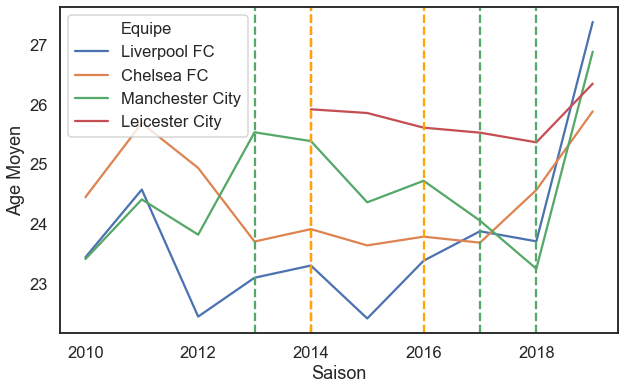

In [32]:
lst=[]
for saison in tm.Saison.unique():
    for eq in tm.Equipe.unique():
        lst+=[(tm[(tm.Saison == saison ) &(tm.Equipe == eq) ].Age.mean(),eq,saison)]
data = pd.DataFrame(lst,columns=['Age Moyen','Equipe','Saison']).set_index('Equipe')
plt.figure(figsize=(10,6))
data=data[(data['Age Moyen']>0)]
data = data.loc[['Liverpool FC','Chelsea FC','Manchester City','Leicester City']]
sns.lineplot(data=data,x='Saison',y='Age Moyen',hue=data.index)
plt.axvline(2018,linestyle = "dashed",
            color="g",label="Victoire EPL Man City")
plt.axvline(2017,linestyle = "dashed",
            color="g",label="Victoire EPL Man City")
plt.axvline(2016,linestyle = "dashed",
            color="orange",label="Victoire EPL Chelsea")
plt.axvline(2014,linestyle = "dashed",
            color="r",label="Victoire EPL Leicester")
plt.axvline(2014,linestyle = "dashed",
            color="orange",label="Victoire EPL Chelsea")
plt.axvline(2013,linestyle = "dashed",
            color="g",label="Victoire EPL Man City")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

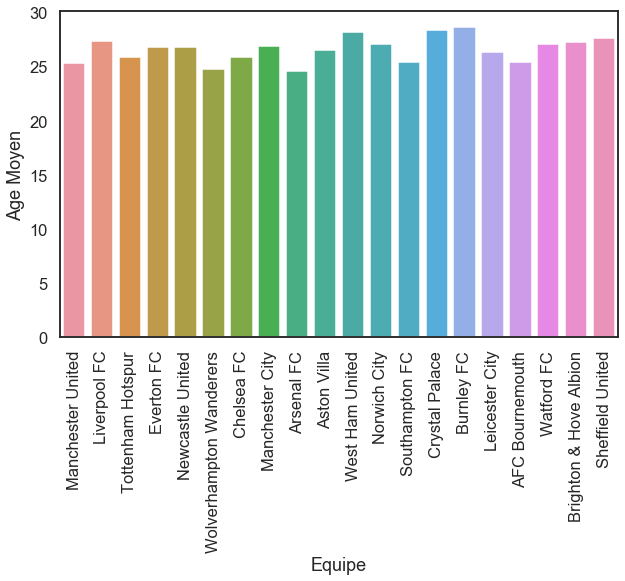

In [38]:
lst=[]
for saison in tm.Saison.unique():
    for eq in tm.Equipe.unique():
        lst+=[(tm[(tm.Saison == saison ) &(tm.Equipe == eq) ].Age.mean(),eq,saison)]
data = pd.DataFrame(lst,columns=['Age Moyen','Equipe','Saison']).set_index('Equipe')
plt.figure(figsize=(10,6))
data=data[data['Age Moyen']>0]
sns.barplot(data=data[data.Saison == 2019],x=data[data.Saison == 2019].index,y='Age Moyen')
plt.xticks(rotation=90)

In [36]:
tm.groupby('Equipe').Taille.mean()

Equipe
AFC Bournemouth            181.348958
Arsenal FC                 182.578947
Aston Villa                182.169291
Birmingham City            183.558824
Blackburn Rovers           183.500000
Blackpool FC               181.666667
Bolton Wanderers           184.347222
Brighton & Hove Albion     182.924528
Burnley FC                 182.908497
Cardiff City               181.415584
Chelsea FC                 183.304239
Crystal Palace             183.283088
Everton FC                 181.848066
Fulham FC                  182.776596
Huddersfield Town          183.500000
Hull City                  182.216216
Leicester City             182.044776
Liverpool FC               182.457534
Manchester City            181.641509
Manchester United          182.974160
Middlesbrough FC           183.914286
Newcastle United           182.659824
Norwich City               182.320988
Queens Park Rangers        181.803150
Reading FC                 183.914286
Sheffield United           182.500000
South

In [41]:
tm = pd.read_csv('Data/BPL_transfert_market3.csv')
tm.Valeur = tm.Valeur.apply(lambda x : int(x.replace('€','').replace('.00m','000000').replace('k','000').replace('-','0').replace('m','0000').replace('.',''))/1000000)
tm['Age'] = tm.DateNaissance.replace('- (-)','').apply(lambda x: int(x[-3:-1]) if len(x)>1 else 0)
tm['Taille'].fillna(180,inplace=True)
tm['Taille'] = tm['Taille'].replace(' m','180')
tm['Taille'] = tm.Taille.apply(lambda x:int(str(x).replace(',','').replace('m','')))
tm.Taille=tm.Taille.apply(lambda x: str(x).replace("m",'').replace(",",""))
tm.Taille.fillna(0,inplace=True)
tm.Taille=tm.Taille.replace('nan',0)
tm.Taille=tm.Taille.replace(' ',0)
tm.Taille=tm.Taille.map(int)
fifa_team = pd.read_json('Data/fifa_team2.json')
fifa_team.Equipe=fifa_team.Equipe.apply(lambda x:x[:-1])

In [52]:
dic = {i : 0 for i in sorted(list(tm.Equipe.unique()))}
dic['AFC Bournemouth'],dic['Arsenal FC'],dic['Aston Villa'],dic['Birmingham City']=7,1,2,3
dic['Blackburn Rovers'],dic['Blackpool FC'],dic['Bolton Wanderers']=4,5,6
dic['Brighton & Hove Albion'],dic['Burnley FC'],dic['Cardiff City']=8,9,10
dic['Chelsea FC'],dic['Crystal Palace'],dic['Everton FC']=11,12,13
dic['Fulham FC'],dic['Huddersfield Town'],dic['Hull City']=14,15,16
dic['Leicester City'],dic['Liverpool FC'],dic['Manchester City']=17,18,19
dic['Manchester United'],dic['Middlesbrough FC'],dic['Newcastle United']=20,21,22
dic['Norwich City'],dic['Queens Park Rangers'],dic['Reading FC']=23,24,25
dic['Sheffield United'],dic['Southampton FC'],dic['Stoke City']=26,27,28
dic['Sunderland AFC'],dic['Swansea City'],dic['Tottenham Hotspur']=29,30,31
dic['Watford FC'],dic[ 'West Bromwich Albion'],dic['West Ham United']=32,33,34
dic['Wigan Athletic'],dic['Wolverhampton Wanderers']=35,36
dic2= {sorted(set(list(fmatchs.HomeTeam.map(str).unique())+list(fmatchs.AwayTeam.map(str).unique())))[i] : i+1 for i in range(0,36)}
tm=pd.merge(tm,pd.DataFrame(dic.items(),columns=['Equipe','cle_eq']),how='left',on='Equipe')
fmatchs = pd.merge(fmatchs,pd.DataFrame(dic2.items(),columns=['Equipe','Cle_eq_H']),how='left',left_on='HomeTeam',right_on='Equipe')
fmatchs.drop('Equipe',axis=1,inplace=True)
fmatchs = pd.merge(fmatchs,pd.DataFrame(dic2.items(),columns=['Equipe','Cle_eq_A']),how='left',left_on='AwayTeam',right_on='Equipe')
fmatchs.drop('Equipe',axis=1,inplace=True)
dic = {i : 0 for i in sorted(list(fifa_team[fifa_team.Championnat == "Premier League"].Equipe.unique()))}
dic['AFC Bournemouth'],dic['Arsenal'],dic['Aston Villa'],dic['Birmingham City']=7,1,2,3
dic['Blackburn Rovers'],dic['Blackpool FC'],dic['Bolton Wanderers']=4,5,6
dic['Brighton'],dic['Burnley'],dic['Cardiff City']=8,9,10
dic['Chelsea'],dic['Crystal Palace'],dic['Everton']=11,12,13
dic['Fulham'],dic['Huddersfield'],dic['Hull City']=14,15,16
dic['Leicester City'],dic['Liverpool'],dic['Manchester City']=17,18,19
dic['Manchester Utd'],dic['Middlesbrough'],dic['Newcastle Utd']=20,21,22
dic['Norwich'],dic['QPR'],dic['Reading']=23,24,25
dic['Sheffield Utd'],dic['Southampton'],dic['Stoke City']=26,27,28
dic['Sunderland'],dic['Swansea City'],dic['Spurs']=29,30,31
dic['Watford'],dic[ 'West Brom'],dic['West Ham']=32,33,34
dic['Wigan Athletic'],dic['Wolves']=35,36
dic['Bournemouth']=7
lst=[]
for eq in tm.Equipe.unique():
    for saison in tm.Saison.unique():
        cle_eq = tm[tm.Equipe == eq].cle_eq.values[0]
        valeurs = list(tm[(tm.Equipe == eq)& (tm.Saison == saison)][['Nationalité']].apply(pd.value_counts).head(2).values)
        avg = tm[(tm.Equipe == eq ) & (tm.Saison == saison)].Valeur.mean()
        taille = tm[(tm.Equipe == eq ) & (tm.Saison == saison)].Taille.mean()
        age = tm[(tm.Equipe == eq ) & (tm.Saison == saison)].Age.mean()
        if not valeurs == []:
            lst +=[(valeurs[0][0],valeurs[1][0],avg,taille,age,saison,cle_eq)]
data= pd.DataFrame(lst,columns=['MaxNbJMN_1_H','MaxNbJMN_2_H','AvgValue_H','AvgH_H','AvgA_H','Saison_H','Cle_eq'])
data2= pd.DataFrame(lst,columns=['MaxNbJMN_1_A','MaxNbJMN_2_A','AvgValue_A','AvgH_A','AvgA_A','Saison_A','Cle_eq'])
fmatchs['Saison'] = fmatchs.Season.apply(lambda x:x[:4])
fmatchs['CleLiaisonH'] = fmatchs['Cle_eq_H'].map(str)+'_'+fmatchs['Saison'].map(str)
data['CleLiaison']=data['Cle_eq'].map(str)+'_'+data['Saison_H'].map(str)
fmatchs =pd.merge(fmatchs,data,how='left',left_on='CleLiaisonH',right_on='CleLiaison')
fmatchs.drop(['Saison_H','Cle_eq','CleLiaison','CleLiaisonH'],axis=1,inplace=True)
fmatchs['CleLiaisonA'] = fmatchs['Cle_eq_A'].map(str)+'_'+fmatchs['Saison'].map(str)
data2['CleLiaison']=data2['Cle_eq'].map(str)+'_'+data2['Saison_A'].map(str)
fmatchs =pd.merge(fmatchs,data2,how='left',left_on='CleLiaisonA',right_on='CleLiaison')
fmatchs.drop(['Saison_A','Cle_eq','CleLiaison','CleLiaisonA'],axis=1,inplace=True)

ft = pd.merge(fifa_team,pd.DataFrame(dic.items(),columns=['Equipe','cle_eq']),how='left',on='Equipe')
ft.dropna(axis=0,inplace=True)
ft['Month']=ft.Date.apply(lambda x : str(x.year) +'/'+ str(x.month))
fmatchs['Month']=fmatchs.Date.apply(lambda x: str(x.year) +'/'+ str(x.month))
lst=[]
for eq in ft.Equipe.unique():
    date_min = ft[(ft.Equipe == eq)].Date.min()
    d=ft[(ft.Equipe == eq) & (ft.Date == date_min)].head(1)
    for i in range(4):
        for j in range(13):
            lst+=[(d.Attaque.values[0],d.Championnat.values[0],d.Date.values[0],d['Défense'].values[0],d.Equipe.values[0],d.Milieu.values[0],d.cle_eq.values[0],str(2010+i)+'/'+str(j),str(2010+i)+'/'+str(j)+'/'+str(d.cle_eq.values[0]))]
ft['CleLiaison']=''
ft=pd.concat([ft,pd.DataFrame(lst,columns=ft.columns)])
ft['CleLiaison'] = ft['Month']+'/'+ft['cle_eq'].map(str)
fmatchs['CleLiaisonH']=fmatchs['Month']+'/'+fmatchs['Cle_eq_H'].map(str)
fmatchs['CleLiaisonA']=fmatchs['Month']+'/'+fmatchs['Cle_eq_A'].map(str)
lst=[]
for eq in ft.cle_eq.unique():
    for mois in ft.Month.unique():
        d=ft[(ft.cle_eq == eq) & (ft.Month == mois) & (ft.Date == ft[(ft.cle_eq == eq) & (ft.Month == mois)].Date.max())].head(1)
        lst+=[(list(d.Attaque.values),list(d['Défense'].values),list(d.Milieu.values),list(d.CleLiaison.values))]
data= pd.DataFrame(lst,columns=['Attaque_H','Defense_H','Milieu_H','CleLiaison'])
data2= pd.DataFrame(lst,columns=['Attaque_A','Defense_A','Milieu_A','CleLiaison'])
data.Attaque_H=data.Attaque_H.apply(lambda x : str(x).replace(']','').replace('[','').replace("'",''))
data.Defense_H=data.Defense_H.apply(lambda x : str(x).replace(']','').replace('[','').replace("'",''))
data.Milieu_H=data.Milieu_H.apply(lambda x : str(x).replace(']','').replace('[','').replace("'",''))
data.CleLiaison=data.CleLiaison.apply(lambda x : str(x).replace(']','').replace('[','').replace("'",''))
data2.Attaque_A=data2.Attaque_A.apply(lambda x : str(x).replace(']','').replace('[','').replace("'",''))
data2.Defense_A=data2.Defense_A.apply(lambda x : str(x).replace(']','').replace('[','').replace("'",''))
data2.Milieu_A=data2.Milieu_A.apply(lambda x : str(x).replace(']','').replace('[','').replace("'",''))
data2.CleLiaison=data2.CleLiaison.apply(lambda x : str(x).replace(']','').replace('[','').replace("'",''))
data.CleLiaison=data.CleLiaison.apply(lambda x:x[:-2])
data2.CleLiaison=data2.CleLiaison.apply(lambda x:x[:-2])
fmatchs=pd.merge(fmatchs,data,how='left',left_on='CleLiaisonH',right_on='CleLiaison')
fmatchs.drop('CleLiaisonH',axis=1,inplace=True)
fmatchs.drop('CleLiaison',axis=1,inplace=True)
fmatchs=pd.merge(fmatchs,data2,how='left',left_on='CleLiaisonA',right_on='CleLiaison')
fmatchs.drop(['CleLiaisonA',"CleLiaison"],axis=1,inplace=True)
fmatchs.fillna(0,inplace=True)
fmatchs.Attaque_H=fmatchs.Attaque_H.replace(0,round(fmatchs.Attaque_H.map(int).mean()))
fmatchs.Attaque_A=fmatchs.Attaque_A.replace(0,round(fmatchs.Attaque_A.map(int).mean()))
fmatchs.Milieu_H=fmatchs.Milieu_H.replace(0,round(fmatchs.Milieu_H.map(int).mean()))
fmatchs.Milieu_A=fmatchs.Milieu_A.replace(0,round(fmatchs.Milieu_A.map(int).mean()))
fmatchs.Defense_H=fmatchs.Defense_H.replace(0,round(fmatchs.Defense_H.map(int).mean()))
fmatchs.Defense_A=fmatchs.Defense_A.replace(0,round(fmatchs.Defense_A.map(int).mean()))
ft['CleLiaison'] = (ft.Date.apply(lambda x:x.year).map(str)+'/'+ft['cle_eq'].map(str))
ft['CleLiaison'] =  ft['CleLiaison'].apply(lambda x:x[:-2])
tm['CleLiaison'] = tm.Saison.map(str)+'/'+tm.cle_eq.map(str)
ft=pd.merge(tm,ft,how='left',on='CleLiaison')
sc= StandardScaler()
ft['AttaqueBis']=sc.fit_transform(np.array(ft.Attaque).reshape(-1, 1))
ft['DéfenseBis']=sc.fit_transform(np.array(ft['Défense']).reshape(-1, 1))
ft['MilieuBis']=sc.fit_transform(np.array(ft.Milieu).reshape(-1, 1))
ft['AgeBis']=sc.fit_transform(np.array(ft.Age_y).reshape(-1, 1))
ft['TailleBis']=sc.fit_transform(np.array(ft.Taille_y).reshape(-1, 1))



NameError: name 'StandardScaler' is not defined

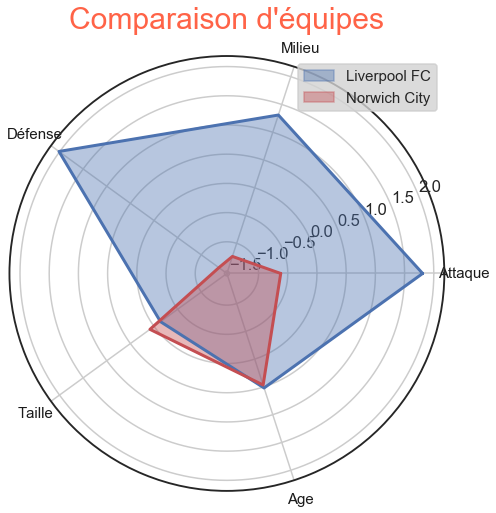

In [62]:
def team_comparator(team1,team2):
    import itertools
    team_list = [team1,team2]
    length    = len(team_list)
    cr        = ["b","r"]
    fig = plt.figure(figsize=(15,8))
    plt.subplot(111,projection= "polar")
    
    for i,j,k in itertools.zip_longest(team_list,range(length),cr):
        cats = ['Attaque','Milieu','Défense','Taille','Age']
        N    = len(cats)
        values = ft[(ft.Equipe_x == i) & (ft.Date ==ft[ft.Equipe_x == i].Date.max()) ][['AttaqueBis','MilieuBis','DéfenseBis','TailleBis','AgeBis']].mean().values.flatten().tolist()
        values += values[:1]

        angles = [n/float(N)*2*math.pi for n in range(N)]
        angles += angles[:1]
        plt.xticks(angles[:-1],cats,color="k",fontsize=15)
        plt.plot(angles,values,linewidth=3,color=k)
        plt.fill(angles,values,color = k,alpha=.4,label = i)
        plt.legend(loc="upper right",frameon =True,prop={"size":15}).get_frame().set_facecolor("lightgrey")
        fig.set_facecolor("w")
        fig.set_edgecolor("k")
        plt.title("Comparaison d'équipes",fontsize=30,color="tomato")
team_comparator("Liverpool FC","Norwich City")

In [ ]:
from scipy.stats import poisson
import numpy as np
s20182019 = matchs[matchs.Season == '2018/2019']
poisson_pred = np.column_stack([[poisson.pmf(i, s20182019[['FTHG','FTAG']].mean()[j]) for i in range(8)] for j in range(2)])
plt.figure(figsize=(8,6))
plt.hist(s20182019[['FTHG','FTAG']].values, range(9), 
         alpha=0.7, label=['Domicile', 'Extérieur'],density=True, color=["#FFA07A", "#20B2AA"])
plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Domicile", color = '#CD5C5C')
plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Extérieur", color = '#006400')
leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Poisson           Réel        ", prop = {'size':'14', 'weight':'bold'})
plt.xticks([i-0.5 for i in range(1,9)],[i for i in range(9)])
plt.xlabel("Buts par match",size=13)
plt.ylabel("Proportion de matchs",size=13)
plt.title("Nombre de buts par match (Saison 2018/2019)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.4])
plt.tight_layout()
plt.show()

Error: Error: Jupyter cannot be started. Error attempting to locate jupyter: Error: Module 'notebook' not installed.